# EGSIS = Exploratory Graph-based Semi Supervised Image Segmentation

Unindo todas as partes: 

- criação de superpixels
- criação de rede complexa
- aplicação da dinâmica coletiva (LCU)
- classificando as regiões não conhecidas
- obtendo segmentos da imagem

O objetivo simples aqui é destacar o fundo do objeto principal, no caso o gato. Realizarei apenas três anotações pra cada classe e rodarei o algoritmo

In [14]:
import os
os.environ["LOGURU_LEVEL"] = "DEBUG"

In [27]:
# ref: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut, cat, microaneurysms, rocket, horse, retina, coins
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte
import networkx as nx

from egsis import model
from egsis.complex_networks import complex_network_from_segments
from egsis.complex_networks import draw_complex_network
from egsis.superpixels import build_superpixels_from_image
from egsis.superpixels import superpixel_centroids
from egsis.superpixels import superpixels_max_radius
from egsis import features
from egsis import image

# Gerar Superpixels

(-0.5, 1410.5, 1410.5, -0.5)

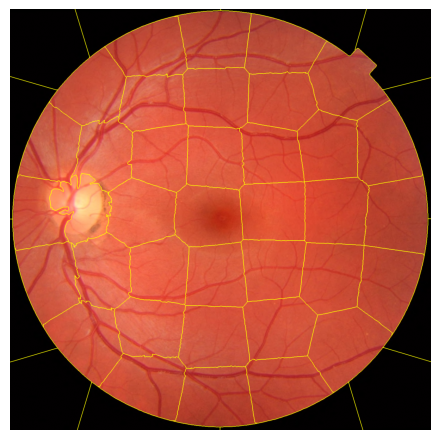

In [16]:
img = img_as_ubyte(retina())
superpixels = build_superpixels_from_image(img, n_segments=53, compactness=40, sigma=0.3)
ax = plt.imshow(mark_boundaries(img, superpixels))
plt.tight_layout()
plt.axis('off')

# Gerar Rede Complexa

(-92.39000000000001, 1502.39, 1502.2849999999999, -91.285)

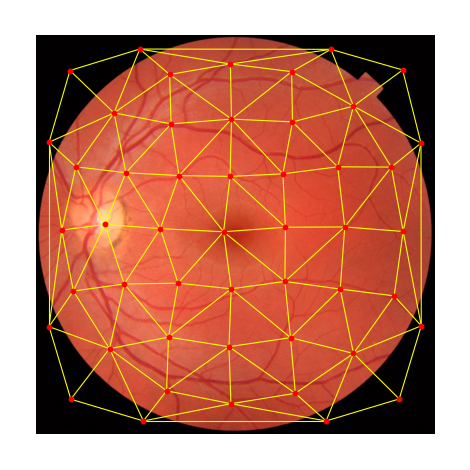

In [17]:
complex_network = complex_network_from_segments(superpixels)
centroids = superpixel_centroids(superpixels)
plt.imshow(img)
draw_complex_network(complex_network, superpixels)
plt.tight_layout()
plt.axis('off')

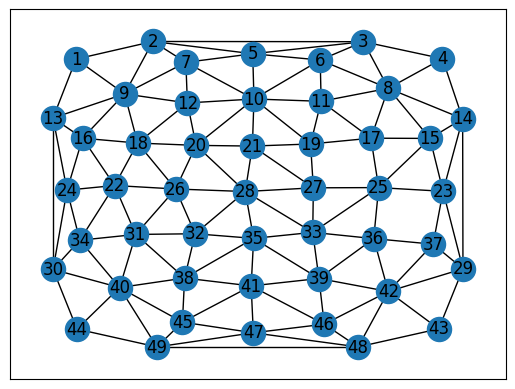

In [18]:
nx.draw_networkx(complex_network, pos=superpixel_centroids(superpixels))
plt.gca().invert_yaxis()
plt.show()

(-92.39000000000001, 1502.39, 1502.2849999999999, -91.285)

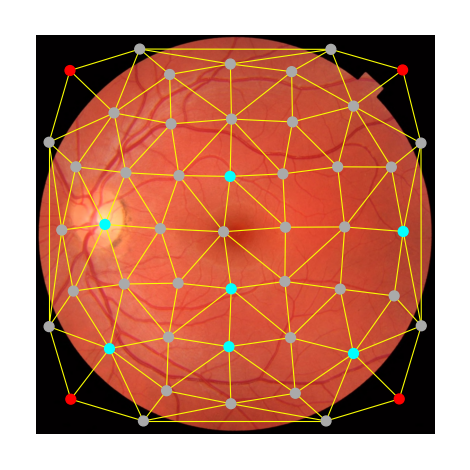

In [19]:
G = complex_network
labels_by_color = {
       1: "#ff0000", # fundo
       2: "#00ffff", # olho
}
superpixel_labels = {
    1:  1,
    4: 1,
    43: 1,
    44: 1,
    41: 2,
    21: 2,
    35: 2,
    22: 2,
    40: 2,
    42: 2,
    23: 2,
}
default = "#aaaaaa"
color_map = [labels_by_color.get(superpixel_labels.get(node), default)
             for node in G.nodes]
for node in G.nodes():
    G.nodes[node]["label"] = superpixel_labels.get(node, 0)
    
plt.imshow(img)
draw_complex_network(G, superpixels, node_size=50, node_color=color_map)
plt.tight_layout()
plt.axis('off')

In [20]:
X = img
y = np.zeros(shape=superpixels.shape, dtype=np.int64)
for superpixel, label in superpixel_labels.items():
    y[superpixels == superpixel] = label

m = model.EGSIS(
    superpixel_segments=53,
    superpixel_sigma=0.3,
    superpixel_compactness=40,
    feature_extraction="comatrix",
    feature_similarity="euclidian_exp",
)

    
G = m.fit_predict(X, y)


2023-10-01 20:03:09.437 | INFO     | egsis.model:fit_predict:142 - Run!
2023-10-01 20:03:22.844 | INFO     | egsis.lcu:__init__:90 - hyperparams: n_classes=2, competition_level=1, max_iter=100
2023-10-01 20:03:22.845 | DEBUG    | egsis.lcu:n0:222 - n0: classes=2, shape=(2, 49)
2023-10-01 20:03:22.847 | INFO     | egsis.lcu:n0:229 - n0: [[1.15384615 0.         0.         1.15384615 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.15384615 1.15384615 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.

(-92.39000000000001, 1502.39, 1502.2849999999999, -91.285)

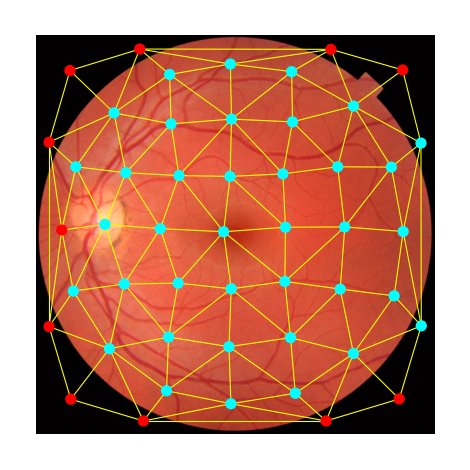

In [21]:
default = "#aaaaaa"
color_map = [labels_by_color.get(G.nodes[node].get("label"), default)
             for node in G.nodes]

plt.imshow(img)
draw_complex_network(G, m.segments, node_size=50, node_color=color_map)
plt.tight_layout()
plt.axis('off')

# Extract segmentation mask from special run over EGSIS

In [22]:
# Fit predict receiving a image mask
mask = m.fit_predict_segmentation_mask(X, y)
mask

2023-10-01 20:03:26.701 | INFO     | egsis.model:fit_predict:142 - Run!
2023-10-01 20:03:39.661 | INFO     | egsis.lcu:__init__:90 - hyperparams: n_classes=2, competition_level=1, max_iter=100
2023-10-01 20:03:39.662 | DEBUG    | egsis.lcu:n0:222 - n0: classes=2, shape=(2, 49)
2023-10-01 20:03:39.664 | INFO     | egsis.lcu:n0:229 - n0: [[1.15384615 0.         0.         1.15384615 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.15384615 1.15384615 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [23]:
from PIL import ImageColor

labels_by_color = {
       1: "#00ff00", # fundo
       2: "#0000ff", # olho
}

ImageColor.getcolor(labels_by_color[2], "RGB")

(0, 0, 255)

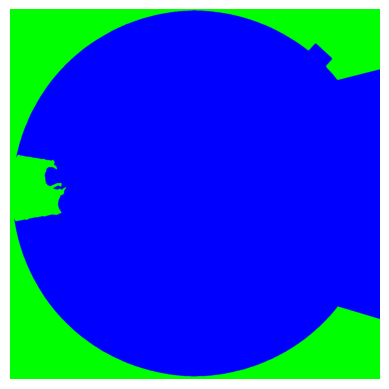

In [24]:
img_mask  = img.copy()
img_mask[mask == 1] = ImageColor.getcolor(labels_by_color[1], "RGB")
img_mask[mask == 2] = ImageColor.getcolor(labels_by_color[2], "RGB")

plt.axis('off')
plt.imshow(img_mask)

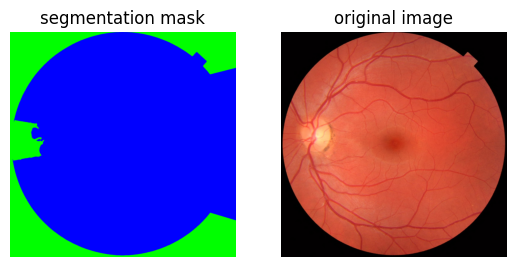

In [25]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_mask)
ax[0].set_title("segmentation mask")
ax[1].imshow(img)
ax[1].set_title("original image")

for a in ax.ravel():
    a.set_axis_off()


# Alpha blending: merge image with segmentation mask

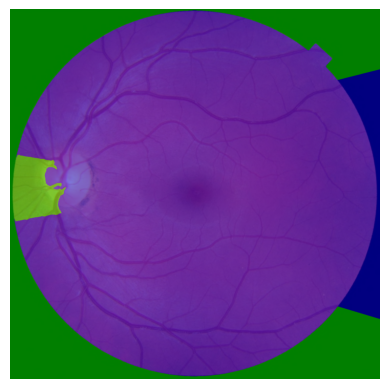

In [26]:
alpha = 0.5
blend = img * (1 - alpha) + img_mask * alpha  
plt.axis('off')
plt.imshow(blend.astype(np.uint8))

(-0.5, 1410.5, 1410.5, -0.5)

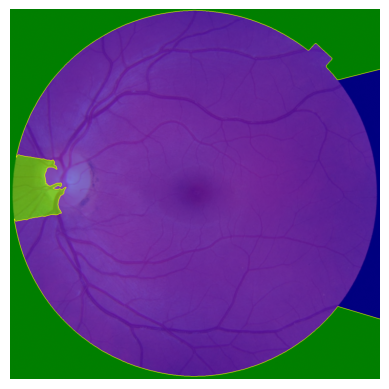

In [29]:
plt.imshow(image.segmentation_mask_blend(img, mask, labels_by_color))
plt.axis('off')